In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv(r"C:\Users\ashwi\Downloads\HR Data Analytics.csv")

In [32]:
df

,EmployeeId,Hrs,Rating,EmployeeSatisfaction
0,E01,12.118051,Excellent,6
1,E02,13.298281,Excellent,8
2,E03,13.276334,Excellent,7
3,E04,10.798173,Excellent,9
4,E05,11.579172,Excellent,8
...,...,...,...,...
495,E496,13.807837,Outstanding,6
496,E497,9.237401,Excellent,8
497,E498,10.444520,Excellent,7
498,E499,12.143046,Excellent,8


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EmployeeId            500 non-null    object 
 1   Hrs                   492 non-null    float64
 2   Rating                500 non-null    object 
 3   EmployeeSatisfaction  500 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


In [36]:
df.isnull().sum()

EmployeeId              0
Hrs                     8
Rating                  0
EmployeeSatisfaction    0
dtype: int64

In [38]:
df['Hrs'].mean().round(2)

11.31

In [40]:
Max=df['Hrs'].max()
Min=df['Hrs'].min()
print('Max=',Max)
print('Min=',Min)

Max= 120.398464
Min= 0.091720323


In [42]:
Q1 = df['Hrs'].quantile(0.25)
Q3 = df['Hrs'].quantile(0.75)
IQR = Q3 - Q1
Lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR
print('Upper bound:', Upper_bound.round(2))
print('Lower bound:', Lower_bound.round(2))

Upper bound: 16.98
Lower bound: 5.35


In [48]:
df['Rating'].nunique()

6

In [46]:
df['Rating'].value_counts().count()

6

In [50]:
df['Rating'].mode()

0    Excellent
Name: Rating, dtype: object

In [52]:
df.duplicated().sum()

0

In [54]:
#Calculate the range of hours the employee is working for in case of unsatisfactory rating.
df['Hrs'] = pd.to_numeric(df['Hrs'], errors='coerce')

In [57]:
df['Rating'].replace('Un satisfactory', 'Unsatisfactory', inplace=True)
df['Rating'].replace('satisfactory', 'Satisfactory', inplace=True)

In [59]:
df_filtered = df[df['Rating'] == 'Unsatisfactory']

In [61]:
max_hrs= df_filtered['Hrs'].max()
min_hrs= df_filtered['Hrs'].min()
range_hrs = max_hrs - min_hrs
print(max_hrs)
print(min_hrs)
print(range_hrs)

8.489765491
0.091720323
8.398045168


C:\Users\ashwi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


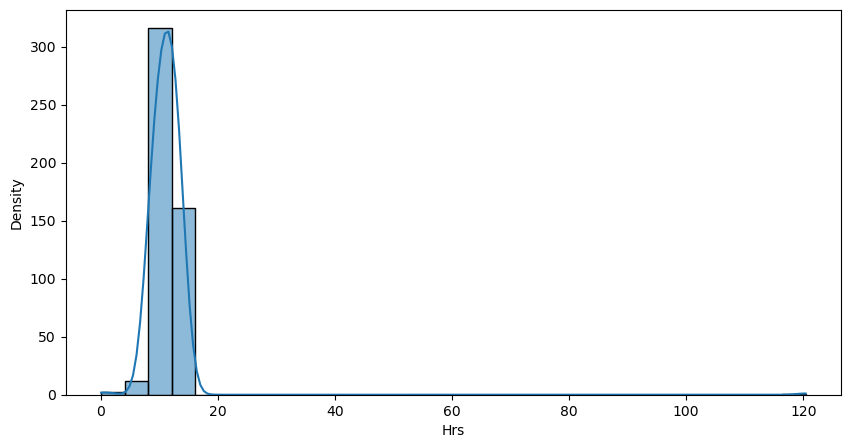

In [65]:
#Check out the distribution of the Hrs variable using histogram and boxplot. Where do we have the outliers?
plt.figure(figsize=(10,5))
sns.histplot(df['Hrs'],bins=30,kde=True)
plt.title='Hrs Distribution'
plt.xlabel('Hrs')
plt.ylabel('Density')
plt.show()

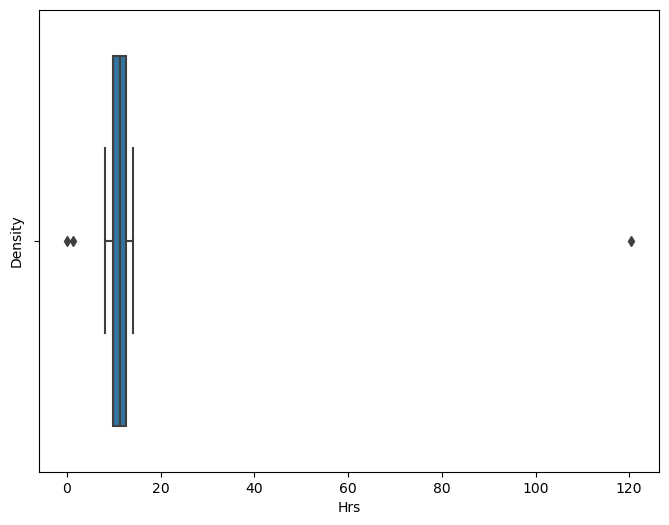

In [68]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Hrs',data =df)
plt.title ='Hrs Distribution'
plt.xlabel('Hrs')
plt.ylabel('Density')
plt.show()

In [70]:
rating_dist = df['Rating'].value_counts()
print(rating_dist)

Rating
Excellent         371
Outstanding        47
Unsatisfactory     47
Satisfactory       35
Name: count, dtype: int64


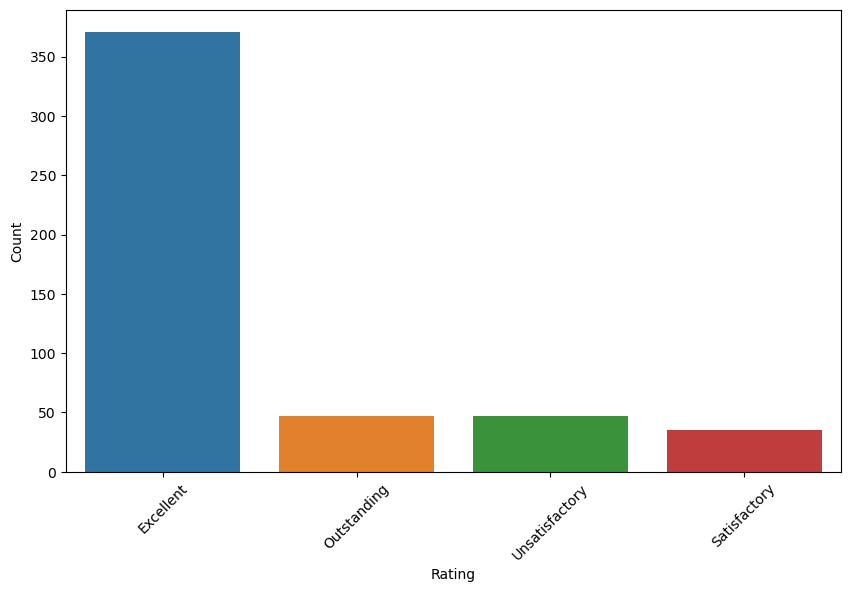

In [72]:
#Choose the correct frequency plot for Rating.
plt.figure(figsize=(10,6))
sns.barplot(x=rating_dist.index, y=rating_dist.values)
plt.title='Frequency of Rating'
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

In [74]:
#Choose the correct frequencies for Employee Satisfaction Score.
df['EmployeeSatisfaction'].value_counts()

EmployeeSatisfaction
7    161
6    142
8    132
9     65
Name: count, dtype: int64

In [76]:
#Which rating has the highest number of average working hours?
max_avg_hrs_rating = df.groupby('Rating')['Hrs'].mean().idxmax()
print(max_avg_hrs_rating)

Outstanding


In [78]:
#Identify the correct upper and lower cut off within Hrs using IQR rule to exclude the outliers. Round off to 2 decimal places.
Q1 = df['Hrs'].quantile(0.25)
Q3 = df['Hrs'].quantile(0.75)
IQR = Q3 - Q1
Lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR
print('Upper bound:', Upper_bound.round(2))
print('Lower bound:', Lower_bound.round(2))

Upper bound: 16.98
Lower bound: 5.35


In [96]:
#After treatment with the outliers, what’s the mean value for Hrs variable?
df_filtered_outliers = df[df['Hrs'].between(Lower_bound, Upper_bound)]
print(df_filtered_outliers)

    EmployeeId        Hrs        Rating  EmployeeSatisfaction
0          E01  12.118051     Excellent                     6
1          E02  13.298281     Excellent                     8
2          E03  13.276334     Excellent                     7
3          E04  10.798173     Excellent                     9
4          E05  11.579172     Excellent                     8
..         ...        ...           ...                   ...
495       E496  13.807837   Outstanding                     6
496       E497   9.237401     Excellent                     8
497       E498  10.444520     Excellent                     7
498       E499  12.143046     Excellent                     8
499       E500   8.615313  Satisfactory                     7

[489 rows x 4 columns]


In [98]:
len(df_filtered_outliers)

489

In [100]:
df_filtered_outliers['Hrs'].mean()

11.130160642118609

In [102]:
#After treatment of outliers, which rating isn’t witnessing changes with respect to Hrs variable?
original_rating = df.groupby('Rating')['Hrs'].mean()
after_outlier_treating_rating = df_filtered_outliers.groupby('Rating')['Hrs'].mean()
print(original_rating)
print()
print(after_outlier_treating_rating)

Rating
Excellent         11.664907
Outstanding       13.739970
Satisfactory       8.786688
Unsatisfactory     7.895444
Name: Hrs, dtype: float64

Rating
Excellent         11.366188
Outstanding       13.739970
Satisfactory       8.786688
Unsatisfactory     8.213704
Name: Hrs, dtype: float64


In [104]:
#understand the Rating variable. Please identify the probabilities for each rating within the dataset. [Hint: Use value_counts]
Rating_count=df['Rating'].value_counts()
Total_rating = Rating_count / 500 * 100

print(Total_rating)

Rating
Excellent         74.2
Outstanding        9.4
Unsatisfactory     9.4
Satisfactory       7.0
Name: count, dtype: float64


In [106]:
#Now considering the probabilities calculated in previous questions, Please calculate the probability that 2 out of a sample of 10 employees are rated as outstanding.
from scipy.stats import binom
n = 10
k = 2
p = 0.094
pmf= binom.pmf(k,n,p)
print(pmf)

0.18050689776637466


In [108]:
#Please calculate the probability that at least 3 out of a sample of 10 employees are rated as outstanding. Round it off to 2 decimal places.
n = 10
k = 3
p = 0.094
pmf= binom.pmf(k,n,p)
print(pmf)

prob = 1 - pmf
n=10
k=2
cdf=1-binom.cdf(k,n,p)
print(round(cdf,2))

0.04994156994860695
0.06


In [120]:
#calculate the probability that at least(Exactly) 7 out of a sample of 10 employees are rated as outstanding or Excellent.
n = 10
k = 7
p1= 0.094
p2 = 0.742
p=p1+p2
pmf= binom.pmf(k,n,p)
print(pmf)
print('pmf=',round(pmf,2))

0.1510625224395229
pmf= 0.15


In [122]:
#calculate the probability that None of the trainees are rated as Unsatisfactory. Round it off to 2 decimal places.
n = 10
k = 0
p = 0.094
pmf= binom.pmf(k,n,p)
print(pmf)
print('pmf=',round(pmf,2))

0.3726335695763792
pmf= 0.37


In [124]:
from scipy.stats import norm

In [126]:
# what’s the probability that an employee will provide less than 9 hrs of service? Round it off to 2 decimal places. [Hint: Use mean and SD for Hrs variable after outlier removal]

mean = df_filtered_outliers['Hrs'].mean()
print('mean of Hrs=',mean)

sd_hrs = df_filtered_outliers['Hrs'].std()
print('sd of Hrs=',sd_hrs)

mean of Hrs= 11.130160642118609
sd of Hrs= 1.7402158929870497


In [128]:
Zscore = (9-11.13)/1.74
print(Zscore)

-1.2241379310344833


In [130]:
prob_less_than_9hrs= norm.cdf(Zscore)
print(prob_less_than_9hrs)

0.11045009955724272


In [132]:
# Calculate probability of working between 11 and 14 hrs (assuming normal distribution)
probability_between_11_14 = norm.cdf(14, loc=11.13, scale=1.74) - norm.cdf(11, loc=11.13, scale=1.74)

# Round the probability to 2 decimal places and print the result
print("Probability of working between 11 and 14 hrs:", round(probability_between_11_14, 2))

Probability of working between 11 and 14 hrs: 0.48


In [134]:
#Calculate the 95% Confidence interval for the average of Hrs variable.
from scipy.stats import t
Mean_μ = 11.13
Sd_σ = 1.74
CI = 95
Sample_size_n = 489

In [136]:
t_statistic = t.ppf(1 - (1 - 0.95) / 2, 489 - 1)
print(t_statistic)

1.9648370701650244


In [138]:
lower_bound = 11.13 - (t_statistic * 1.74 / np.sqrt(489))
upper_bound = 11.13 + (t_statistic * 1.74 / np.sqrt(489))
print(lower_bound)
print(upper_bound)

10.975395773602644
11.284604226397358
